In [1]:
from preset import set_proxy_and_token
set_proxy_and_token()

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
pipeline.to("cuda")
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

2025-02-04 21:26:52.362853: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 21:26:52.372370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738675612.383965  112461 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738675612.387084  112461 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 21:26:52.398526: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

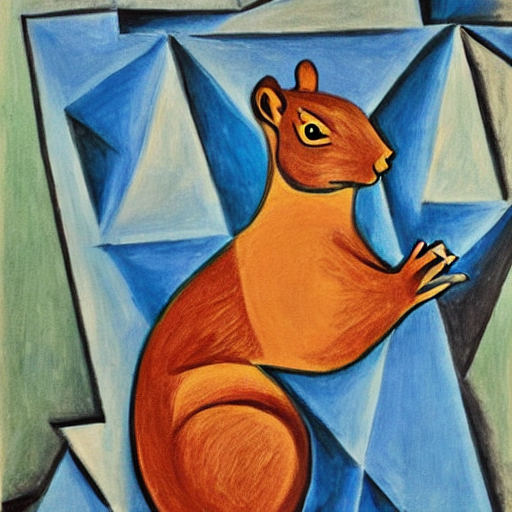

In [3]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.bfloat16,
    use_safetensors=True)
pipeline.to("cuda")
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [3]:
from diffusers import BitsAndBytesConfig as DiffusersBitsAndBytesConfig
from transformers import BitsAndBytesConfig as TransformersBitsAndBytesConfig

from diffusers import StableDiffusionPipeline, AutoencoderKL, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

quant_config = DiffusersBitsAndBytesConfig(load_in_8bit=True,)

vae = AutoencoderKL.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    subfolder="vae",
    torch_dtype=torch.bfloat16,
    quantization_config=quant_config,
)
unet = UNet2DConditionModel.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    subfolder="unet",
    torch_dtype=torch.bfloat16,
    quantization_config=quant_config,
)

quant_config = TransformersBitsAndBytesConfig(load_in_8bit=True)

text_encoder = CLIPTextModel.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    subfolder="text_encoder",
    torch_dtype=torch.bfloat16,
    quantization_config=quant_config,
    device_map="auto",
) 
pipeline = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    vae=vae,
    unet=unet,
    text_encoder=text_encoder,
    torch_dtype=torch.bfloat16,
    use_safetensors=True,
)
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/xinchengo/miniconda3/envs/seminar/lib/python3.12/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: Input type (CUDABFloat16Type) and weight type (CPUBFloat16Type) should be the same

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

In [2]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
pipe.enable_vae_slicing()
#pipe.enable_xformers_memory_efficient_attention()
images = pipe([prompt] * 32).images

2025-02-04 20:55:13.206453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738673713.218103   97511 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738673713.221448   97511 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

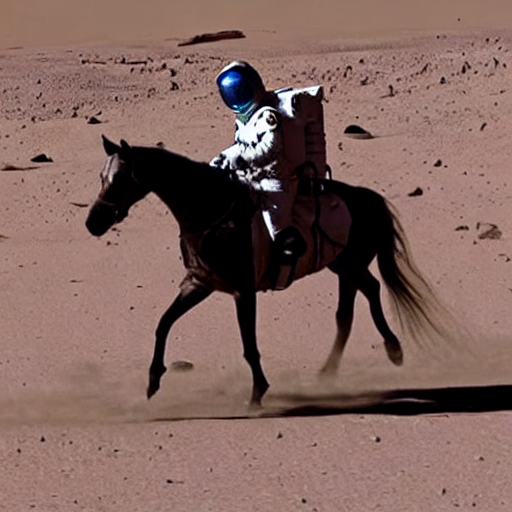

In [15]:
images[12]

In [4]:
# Show occupied GPU memory of torch
import torch
print(torch.cuda.memory_allocated())

1226362880
